In [29]:
import numpy as np 
import pandas as pd
import random
import time
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("距離矩陣0.csv",encoding="utf-8")

In [3]:
distance_matrix=np.array(df[list(df.columns[1:-2])][0:12])
distance_matrix

array([[  0, 350, 100, 500, 350, 400, 250, 600, 400, 400, 110, 240],
       [350,   0, 350, 160, 300, 100, 650, 350, 750, 650, 500, 500],
       [100, 350,   0, 500, 450, 450, 260, 750, 400, 290, 120, 270],
       [500, 160, 500,   0, 270, 180, 750, 280, 700, 750, 600, 600],
       [400, 300, 450, 270,   0, 400, 500, 250, 450, 750, 350, 600],
       [400, 100, 400, 180, 400,   0, 700, 450, 850, 700, 550, 500],
       [250, 650, 260, 750, 500, 700,   0, 750, 270, 300,  31, 300],
       [600, 350, 750, 280, 250, 450, 750,   0, 650,   1, 550, 850],
       [400, 750, 400, 700, 450, 850, 270, 650,   0, 550, 170, 550],
       [500, 750, 400, 850, 750, 800, 400,   1, 550,   0, 300, 400],
       [110, 500, 120, 600, 350, 550,  31, 550, 170, 230,   0, 210],
       [240, 500, 240, 600, 600, 500, 300, 850, 550, 290, 210,   0]],
      dtype=int64)

In [4]:
for i in range(len(distance_matrix)):            ##處理距離裡面有1為一公里
    for j in range(len(distance_matrix)):
        if distance_matrix[i][j]==1:
            distance_matrix[i][j]=1000

In [5]:
def cal_distance(route):                        #目標函數的計算
    distance=sum([(distance_matrix[route[i],route[i+1]]) for i in range(len(route)-1)])
    return distance

In [6]:
def pop(num):                                    #初始解的建立
    n=num
    route0=random.sample(range(0,n),n)
    route0.append(10)   #固定尾巴:醫院
    route0.insert(0,11) #固定頭:飯店
    return  route0

In [7]:
def change(rou):                                #更換路徑
    rou1=rou.copy()
    index=random.choices(range(1,len(x_1)-2),weights=None,k=2)
    rou1[index[0]],rou1[index[1]]=rou1[index[1]],rou1[index[0]]
    return rou1

In [36]:
init_t=1000 #初始溫度
min_t=1     #最小溫度
iter=500    #迭代次數
eta=0.95    #降溫因子

evetime_distance = []
evetime_route = []

t = init_t


t_start=time.time()

x_1=pop(num=10)
print("init solution :",x_1)
while t>min_t:                     #當溫度達到最小溫度停止
    for i in range(iter):          #當迭帶次數達到停止
        value_1=cal_distance(x_1)    
        x_2=change(x_1)          
        value_2=cal_distance(x_2)    
        delta=value_2-value_1      
        
        #更換解，透過兩個解的差，跟隨機因子
        if delta<0 or np.exp(-delta/t)>random.uniform(0,1):
            x_1=x_2
    
    evetime_route.append(x_1)
    evetime_distance.append(cal_distance(x_1))  
    t=t*eta                    #更新溫度
t_end=time.time()     

print("最優解(x): ",x_1)
print("最優值(y)：",cal_distance(x_1))
print("運行時間:",t_end-t_start)

init solution : [11, 5, 6, 3, 8, 1, 7, 9, 0, 4, 2, 10]
最優解(x):  [11, 9, 8, 6, 0, 4, 7, 3, 5, 1, 2, 10]
最優值(y)： 2990
運行時間: 0.664557695388794


In [24]:
print(evetime_distance[-1])
print(evetime_route[-1])

3230
[11, 0, 2, 9, 6, 8, 4, 7, 1, 5, 3, 10]


In [25]:
len(evetime_route)

135

In [26]:
len(evetime_distance)

135

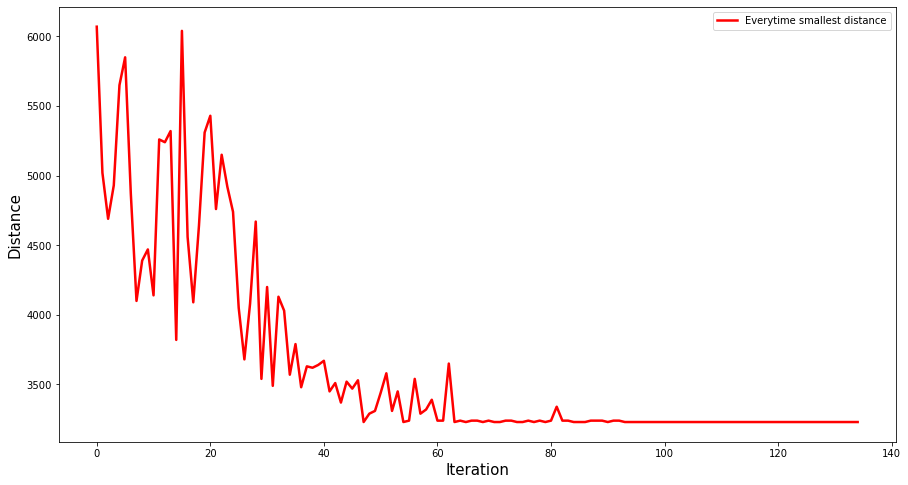

In [27]:
plt.figure(figsize = (15,8))
plt.xlabel("Iteration",fontsize = 15)
plt.ylabel("Distance",fontsize = 15)

plt.plot(evetime_distance,linewidth = 2.5, label = "Everytime smallest distance", color = 'r')
plt.legend()
plt.show()

In [ ]:
#窮舉法

from itertools import permutations

def exhaustive(Route0):
    Route1 = Route0
    special_start = []
    permutDis = []
    eveans = list(permutations(Route1, 11))  #產生各種排列組合 
    for i in range(len(eveans)): #找出特定起點的排列組合
        if eveans[i][0] == Route0[0] and eveans[i][-1] == Route0[-1]:
            special_start.append(eveans[i])
    for i in range(len(special_start)): #特定排列組合計算距離
        dis = TtotalDistance(special_start[i])
        permutDis.append(dis)
    smallest_distance = min(permutDis)   #找出最短距離
    arr = permutDis.index(smallest_distance) #用最小值找回路徑
    smallest_route = special_start[arr]   
    return smallest_route, smallest_distance

exhaustive(pop(10))